https://leetcode.com/problems/accounts-merge/description/

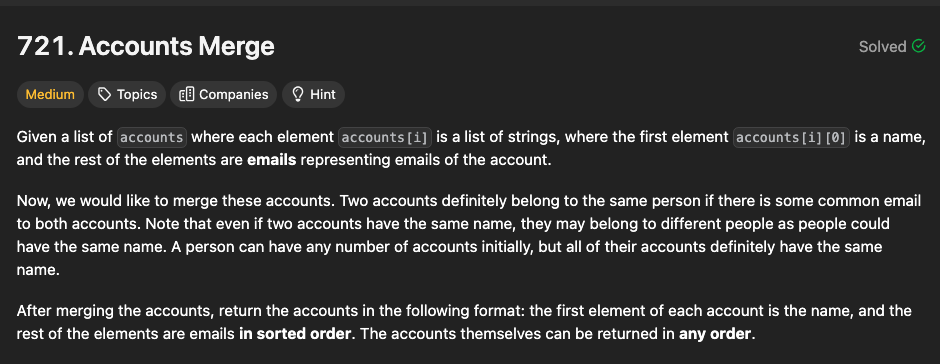

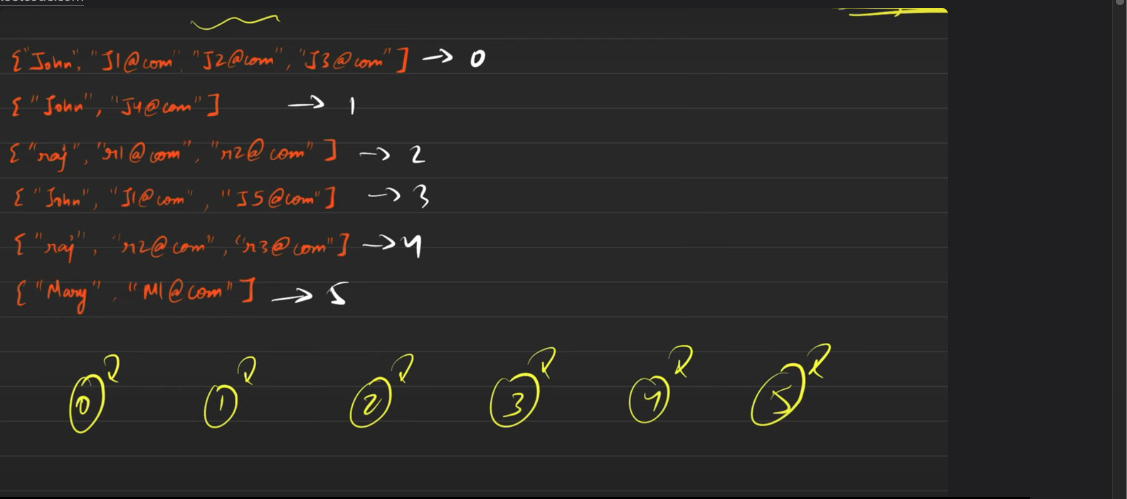

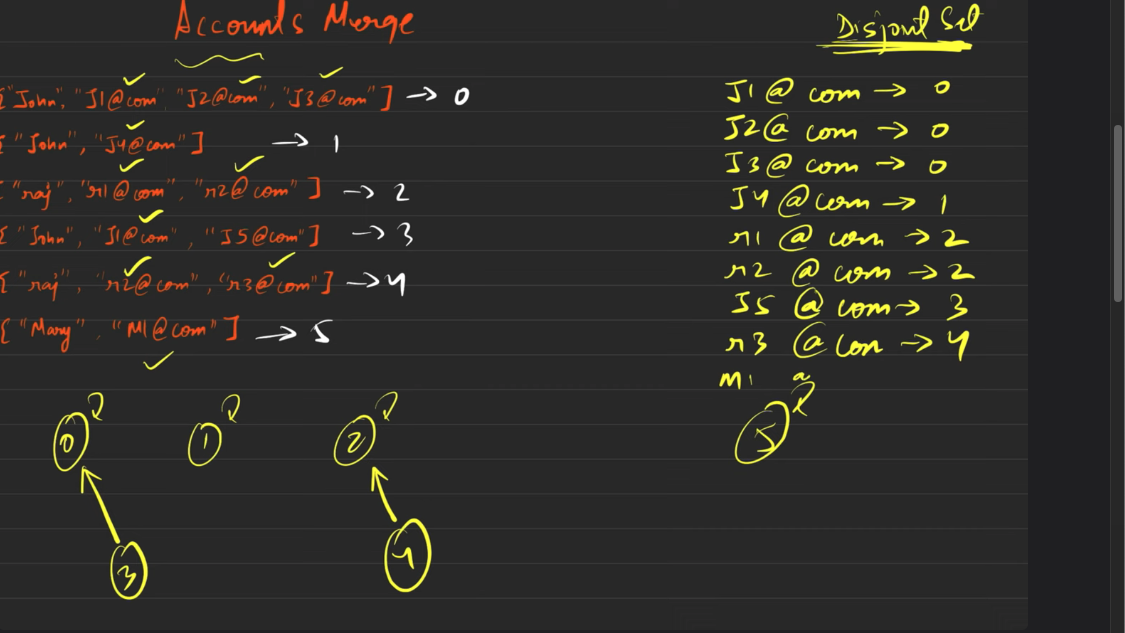

In [ ]:
class Solution {
public:
    class dsu {
        vector<int> par;
    public:
        dsu(int n){
            for(int i=0;i<n;i++) par.push_back(i);
        }
        void union_(int i, int j) {
            par[find(i)] = find(j);
        }
        int find(int node){
            if(par[node]==node){
                return node;
            } 
            return par[node]=find(par[node]);
        }
        void reset(int i){ 
            par[i] = i; 
        }
    };


    vector<vector<string>> accountsMerge(vector<vector<string>>& accounts) {
        int n=accounts.size();
        dsu d(n);
        unordered_map<string,int> m;
        for(int i=0;i<accounts.size();i++)
            for(int j=1;j<accounts[i].size();j++){
                    string mail=accounts[i][j];
                    if(!m.count(mail)){
                        m[mail]=i;
                    } 
                    else{
                        d.union_(i,m[mail]);
                    } 
                }
        
        vector<vector<string>> tmp(n);
        
        //map is storing {email, ifOfPerson}
        for(auto p: m){
            tmp[d.find(p.second)].push_back(p.first);
        } 
        for(auto &vos: tmp){
            sort(vos.begin(),vos.end());
        } 

        vector<vector<string>> ans;
        for(int i=0;i<n;i++){
            if(tmp[i].empty()){
                continue;
            }
            vector<string> build;
            build.push_back(accounts[i][0]);
            for(string s: tmp[i]){
                build.push_back(s);
            } 
            ans.push_back(build);
        }
        return ans;
    }
};